# 4 链表与数组
## 4.1数组

数组array是一种线性的数据结构，其将相同类型的元素存储在连续的内存空间中。我们将元素在数组中的位置称为该元素的索引index。下图主要展示了数组的主要概念和存储方式。
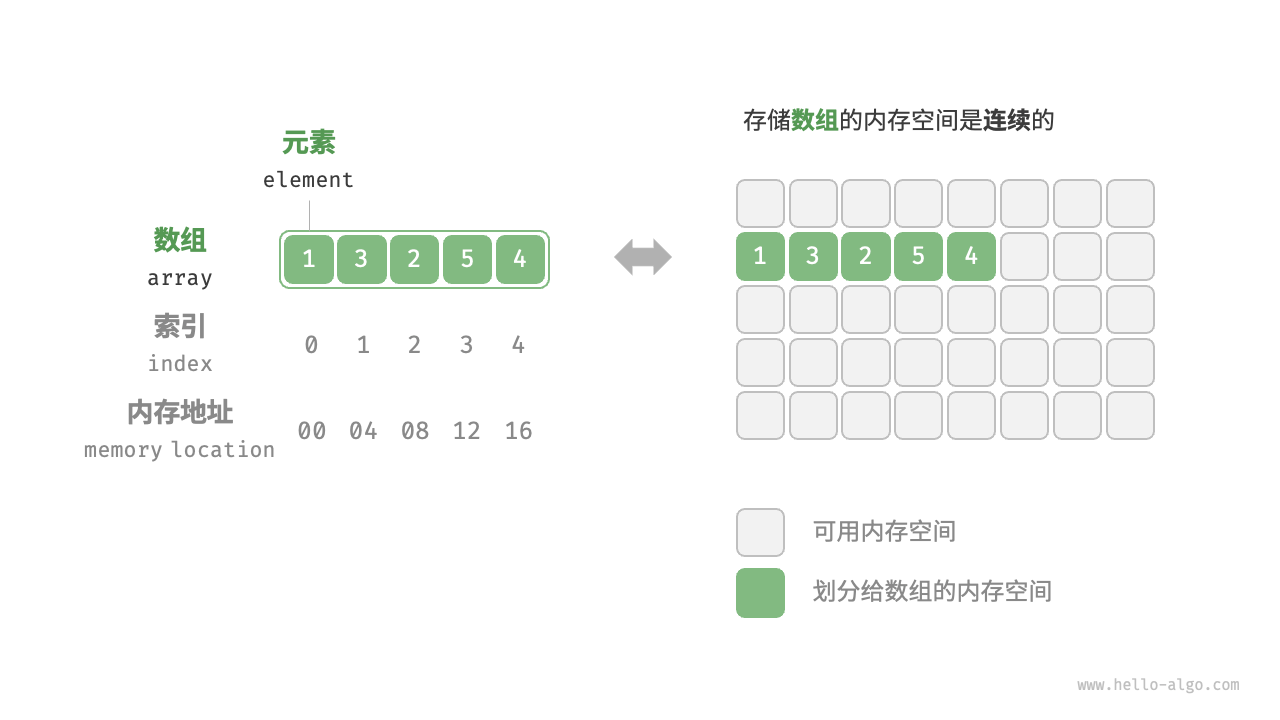

### 4.1.1数组的常用操作
#### 1.初始化数组
我们可以根据需求选用数组的两种初始化方式：无初始值，给定初始值。在未指定初始值的情况下，大多数编程语言会将数组元素初始化为0：

In [8]:
//初始化数组
var arr [5]int
// 在go语言中 指定长度时([5]int)是数组，不指定长度的时候是切片([]int)
// 为了方便实现扩容后extend()方法，以下将切片(slice)看作数组array。
var nums = []int{1, 2, 3, 4, 5}

#### 2.访问元素
数组元素被存储在连续的内存空间中，这意味着计算数组元素的内存地址非常容易。给定数组内存地址（首元素内存地址）和某个元素的索引，我们可以利用下图所示公式来计算得到该内存的元素地址，从而直接访问这个元素。
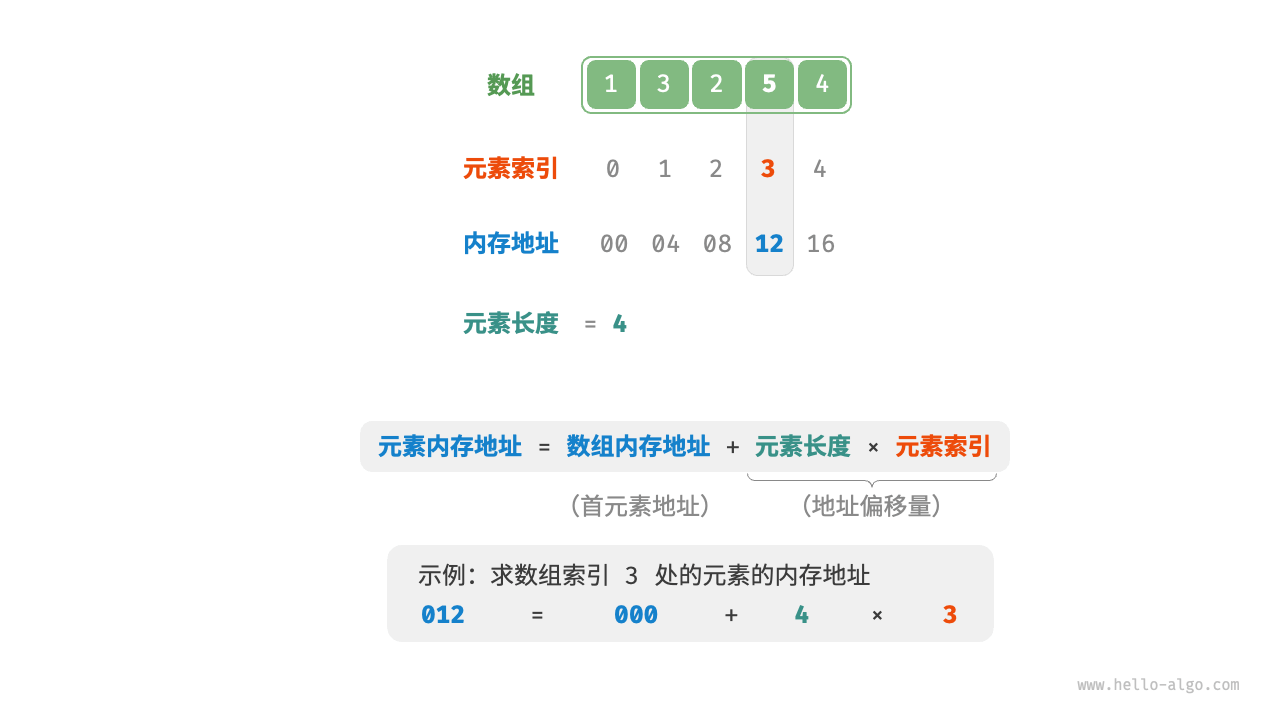
观察这个图像，我们可以发现数组首个元素的索引为0，这是因为从计算公式上来看，**索引本质上是内存地址的偏移量**。首个元素的地址偏移量是0，因此它的索引为0是合理的。
在数组中访问元素是非常高效的，基本上我们可以在O(1)时间内随机访问数组中的任意一个元素。


In [9]:
// 随机访问元素
func randomAccess(nums []int) (randomNum int) {
	// 在区间[0,nums.length]中随机抽取一个数字
	randomIndex := rand.Intn(len(nums))
	// 获取并返回随机元素
	randomNum = nums[randomIndex]
	return
}

#### 3.插入元素
数组元素在内存中是紧挨着的，他们之间没有空间再存放任何数据，如下图所示，如果想在数组中间插入一个元素，则需要将该元素之后的所有元素都向后移动一位，之后再把元素赋值给索引。
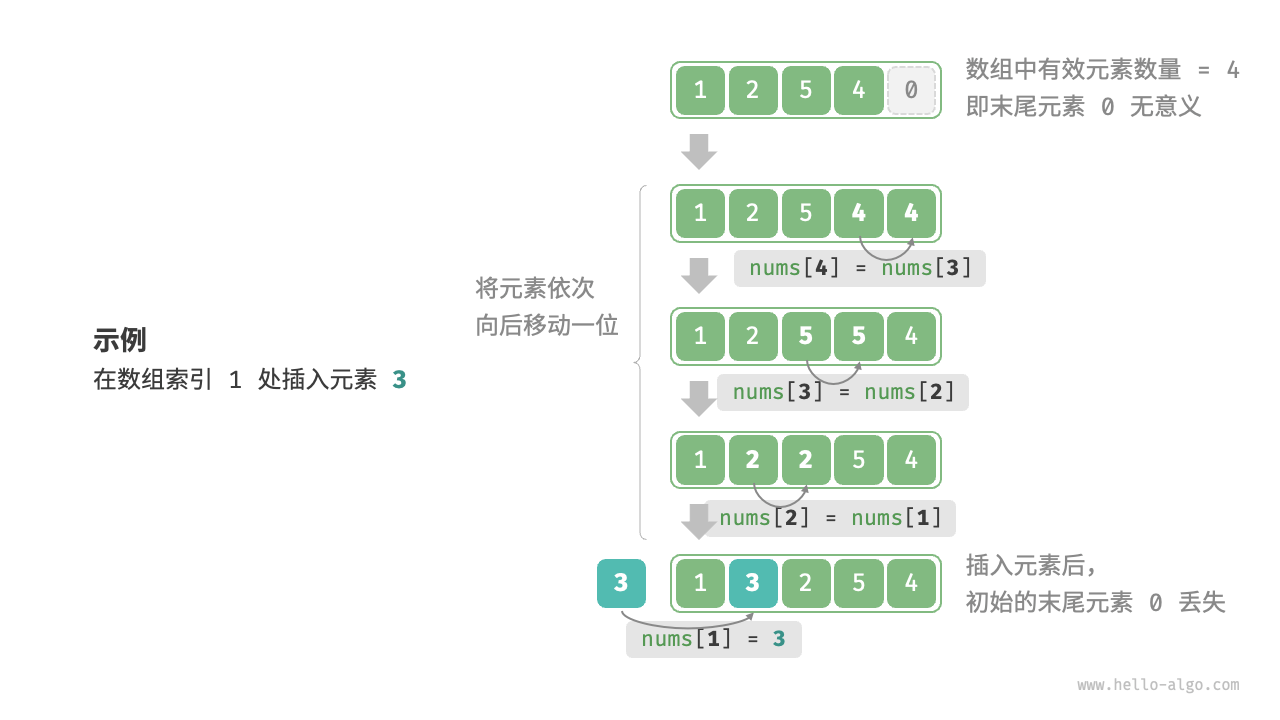
值得注意的是，由于数组的长度是固定的，因此插入一个元素必定会导致数组尾部元素丢失，我们把这个问题的解决方法留在列表章节讨论。


In [11]:
func insert(nums []int , num int ,index int) {
	for i := len(nums) - 1;i > index ;i--{
		nums[i] = nums[i-1]
	}
	nums[index] = num
}

#### 4.删除元素
同理 ，想要删除索引i处的元素，我们需要把索引i之后的元素都向前移动一位。
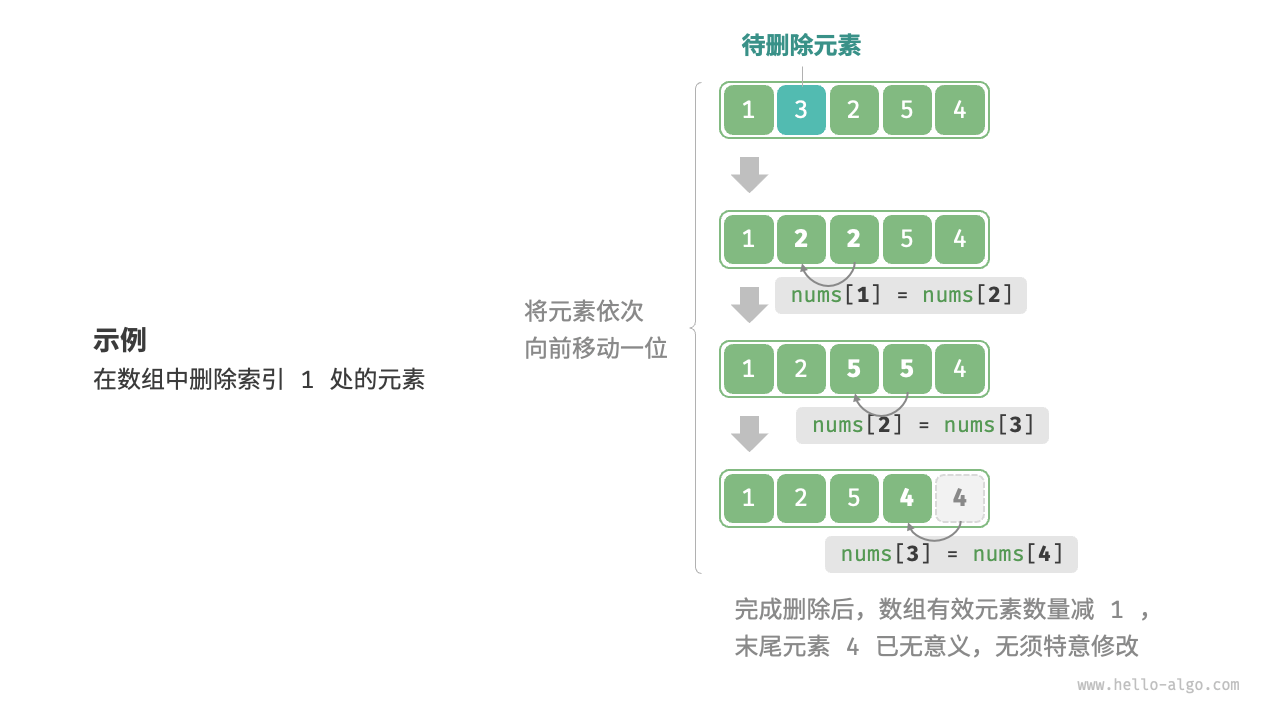
注意，删除元素完成之后，原先末尾的元素变得没有意义了，所以我们不用特意去修改它。


In [ ]:
func remove(nums []int , index int){
	for i:= index; i < len(nums) - 1 ; i++{
		nums[i] = nums[i+1]
	}
}

总体来看，数组的插入与删除操作有以下缺点：
- 时间复杂度高： 数组的插入和删除的平均时间复杂度均为O(n),其中n为数组长度。
- 丢失元素：由于数组的长度不可变，因此再插入元素后，超出数组长度范围的元素会丢失。
- 内存浪费：我们虽然可以初始化一个比较长的数组，可以先只用前面一部分，这样再插入数据时，丢失的末尾元素都是无意义的，but这样会造成部分内存空间浪费。

#### 5.遍历数组
在大多数编程语言中，我们可以通过索引遍历数组，也可以直接遍历获取数组中的每个元素


In [ ]:
func traverse(nums []int) {
	count := 0
	// 1.通过索引遍历
	for i := 0 ; i < len(nums) ; i++{
		count += nums[i]		
	}
	count = 0
	//2.通过元素遍历
	for _,num := range nums{
		count += num
	}
	count = 0
	//3.同时通过索引与元素遍历
	for i,num := range nums{
		count += nums[i]
		count += num
	}
}

#### 6.查找元素
在数组中查找指定元素需要遍历数组，每轮判断元素值是否匹配，如果匹配那么久输出对应索引。
因为数组是线性数据结构，所以上述查找操作被称为“线性查找”



In [ ]:
func find(nums []int, target int) (index int){
	index = -1
	for i := 0 ; i < len(nums) ; i++{
		if nums[i] == target{
			index = i
			break
		}
	}
	return index
}

#### 7.扩容数组
在复杂的系统环境中，程序难以保证数组之后的内存空间是可用的，从而无法安全地扩展数组容量。因此在大多数编程语言中，数组的长度是不可变的。
如果我们希望扩容数组，那么就需要重新简历一个更大的数组，然后把原数组元素一次复制到新数组，这是一个O(n)的操作，在数组很大的情况下非常耗时间

In [ ]:
func extend(nums []int, enlarge int) []int {
//我们先初始化一个扩展长度后的数组
res := make([]int, len(nums)+enlarge)
//将原数组中所有元素复制到新数组中
for i := 0;i < len(nums);i++{
	res[i] = nums[i]
}
return res
}

### 4.1.2数组的优点与局限性

数组存储在连续的内存空间内，且元素类型相同。这种做法包含丰富的先验信息，系统可以利用这些信息来优化数据结构的操作效率。

- **空间效率高**：数组为数据分配了连续的内存块，无须额外的结构开销。
- **支持随机访问**：数组允许在 $O(1)$ 时间内访问任何元素。
- **缓存局部性**：当访问数组元素时，计算机不仅会加载它，还会缓存其周围的其他数据，从而借助高速缓存来提升后续操作的执行速度。

连续空间存储是一把双刃剑，其存在以下局限性。

- **插入与删除效率低**：当数组中元素较多时，插入与删除操作需要移动大量的元素。
- **长度不可变**：数组在初始化后长度就固定了，扩容数组需要将所有数据复制到新数组，开销很大。
- **空间浪费**：如果数组分配的大小超过实际所需，那么多余的空间就被浪费了。

### 4.1.3数组典型应用

数组是一种基础且常见的数据结构，既频繁应用在各类算法之中，也可用于实现各种复杂数据结构。

- **随机访问**：如果我们想随机抽取一些样本，那么可以用数组存储，并生成一个随机序列，根据索引实现随机抽样。
- **排序和搜索**：数组是排序和搜索算法最常用的数据结构。快速排序、归并排序、二分查找等都主要在数组上进行。
- **查找表**：当需要快速查找一个元素或其对应关系时，可以使用数组作为查找表。假如我们想实现字符到 ASCII 码的映射，则可以将字符的 ASCII 码值作为索引，对应的元素存放在数组中的对应位置。
- **机器学习**：神经网络中大量使用了向量、矩阵、张量之间的线性代数运算，这些数据都是以数组的形式构建的。数组是神经网络编程中最常使用的数据结构。
- **数据结构实现**：数组可以用于实现栈、队列、哈希表、堆、图等数据结构。例如，图的邻接矩阵表示实际上是一个二维数组。

## 4.2链表

内存空间是所有程序的公共资源，在一个复杂的系统运行环境下，空闲的内存空间可能散落在内存各处。当数组非常大时，内存可能无法提供如此庞大的连续空间，这个时候就要用到链表了。

链表（linked list）是一种线性数据结构，其中的每个元素都是一个节点对象，各个节点通过“引用”（指针）相连接。引用记录了下一个节点的内存地址，通过它可以从当前节点访问到下一个节点。

链表的设计使得各个节点可以分散存储在内存各处，它们的内存地址无须连续。
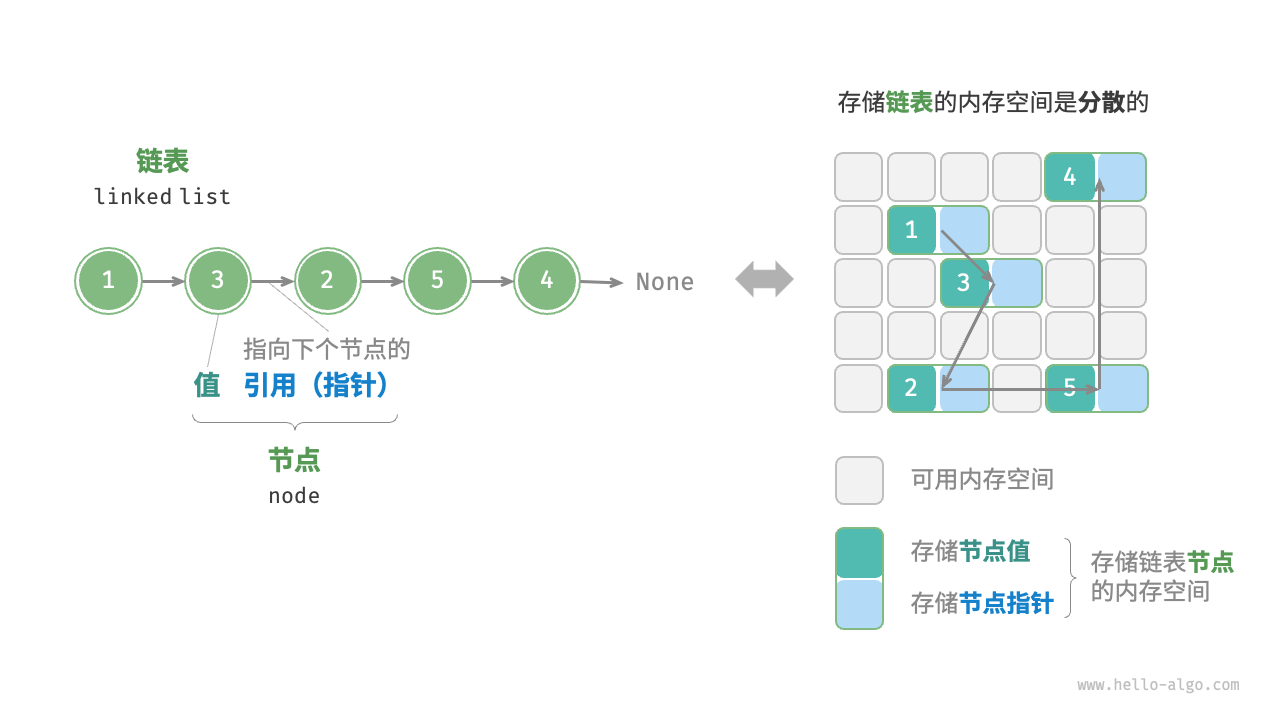
指向下一个节点的引用-指针
- 链表的首个节点被称为“头节点”，最后一个节点被称为“尾节点”。
- 尾节点指向的是“空”，它在 Java、C++ 和 Python 中分别被记为 null、nullptr 和 None 。
- 在 C、C++、Go 和 Rust 等支持指针的语言中，上述“引用”应被替换为“指针”。
如以下代码所示，链表节点 ListNode 除了包含值，还需额外保存一个引用（指针）。因此在相同数据量下，链表比数组占用更多的内存空间。

In [3]:
type ListNode struct {
	val int //节点值
	Next *ListNode //指向下一个节点的指针
}
// 构建NewListNode构造函数，创建一个新链表
func NewListNode(val int) *ListNode { //*listnode表示返回的是一个指针
	return&ListNode{
		val: val,
		Next: nil,
	}
}
//这个函数接收一个 int 类型的 val。

//它在函数内部创建了一个 ListNode 结构体的新实例（ListNode{val: val, Next: nil}）。

//& 符号是“取地址”操作符。&ListNode{...} 会在内存中创建这个新的结构体实例，然后返回该实例的内存地址。

//这个返回的内存地址（指针）的类型就是 *ListNode，与函数签名中声明的返回类型 *ListNode 一致。

### 4.2.1 链表的常用操作
#### 1.初始化链表
建立链表分为两步，第一步是初始化各个节点对象，第二步是构建节点之间的引用关系。初始化完成后，我们可以从链表的头节点出发，通过引用指向`next`依次访问所有的节点。

In [11]:
package main
//初始化节点 1 - 3 - 2 - 5 -4
// 初始化各个节点
func main() {
n0 := NewListNode(1)
n1 := NewListNode(3)
n2 := NewListNode(2)
n3 := NewListNode(5)
n4 := NewListNode(4) //此处的n0是节点

n0.Next = n1
n1.Next = n2
n2.Next = n3
n3.Next = n4
}

数组整体是一个变量，比如数组nums包含元素nums[0]和nums[1]等，而链表是由多个独立的节点对象组成的。**我们一般将头节点当作链表的代称**，比如以上代码中的链表可以记作链表`n0`。
#### 2 插入节点
在链表中插入节点非常容易。如下图所示，假设我们想在相邻的两个节点 `n0` 和 `n1` 之间插入一个新节点 `P` ，**则只需改变两个节点引用（指针）即可**，时间复杂度为 $O(1)$ 。

相比之下，在数组中插入元素的时间复杂度为 $O(n)$ ，在大数据量下的效率较低。

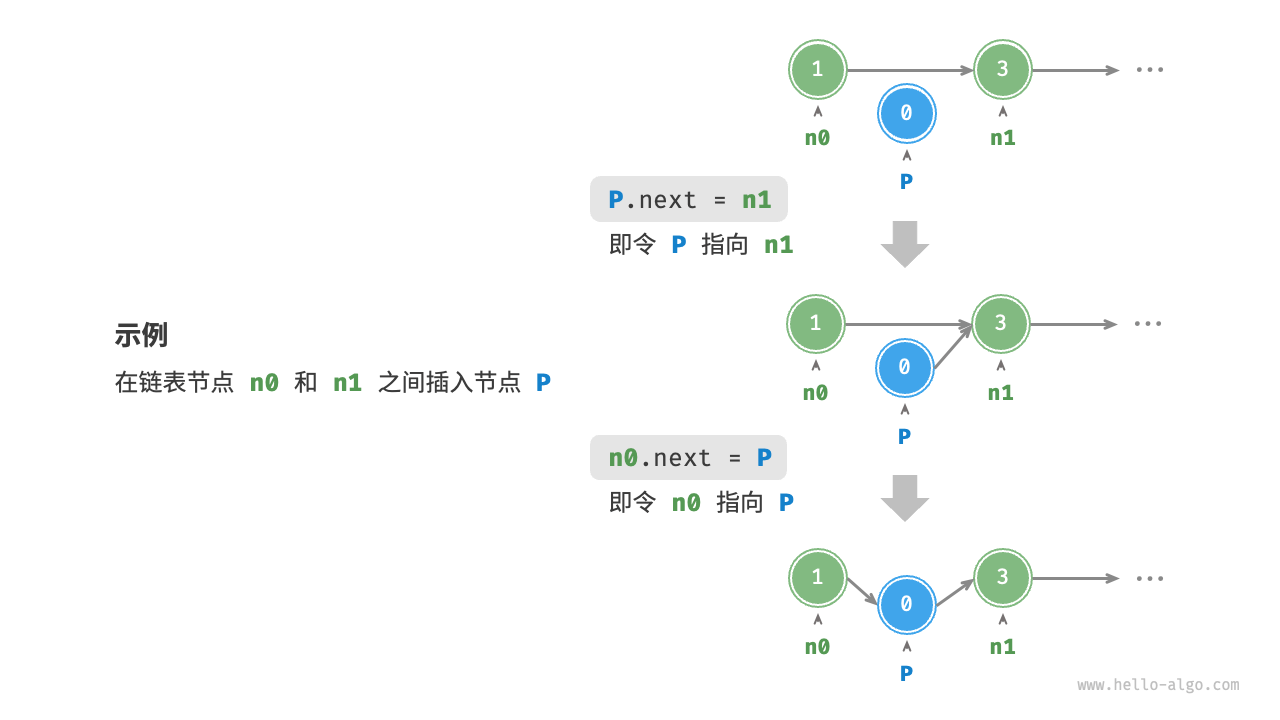

In [13]:
func insertNode(n0 *ListNode,P *ListNode){
	n1 := n0.Next
	P.Next = n1
	n0.Next = P
}

#### 3 删除节点

如下图所示，在链表中删除节点也非常方便，**只需改变一个节点的引用（指针）即可**。

请注意，尽管在删除操作完成后节点 `P` 仍然指向 `n1` ，但实际上遍历此链表已经无法访问到 `P` ，这意味着 `P` 已经不再属于该链表了。
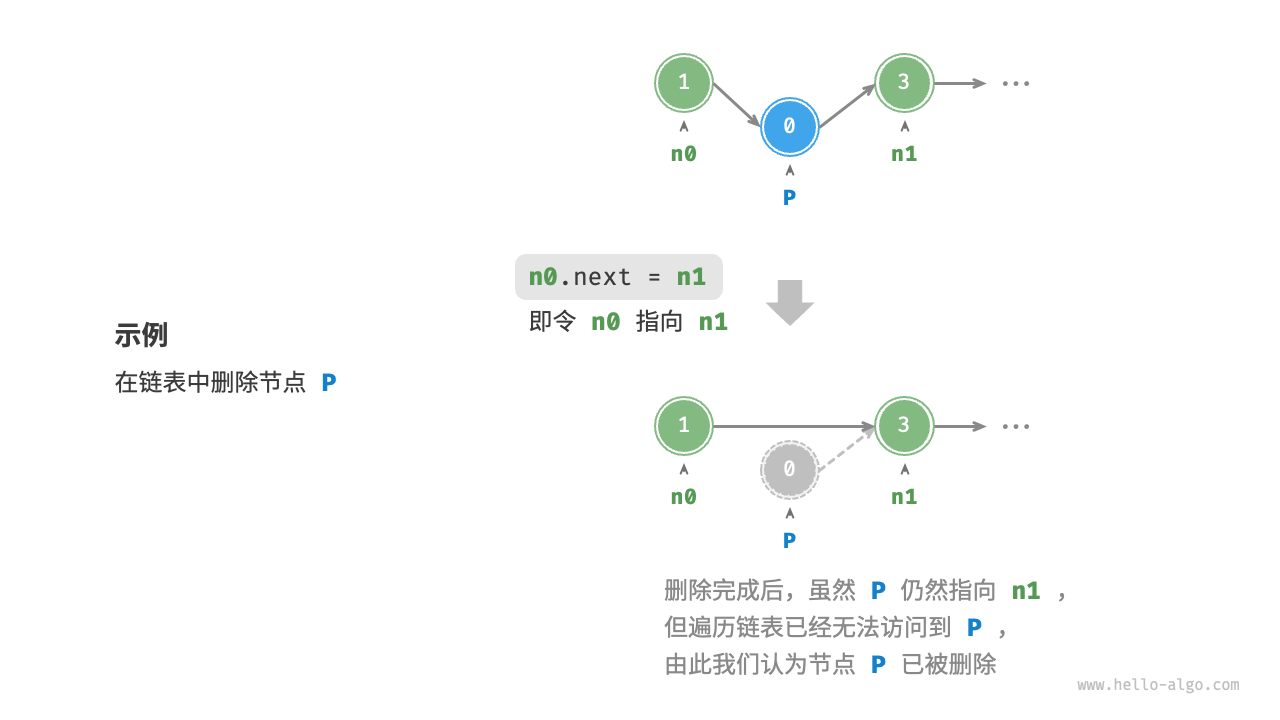

In [16]:
func removeItem(n0 *ListNode){
	if n0.Next != nil{
		P := n0.Next
		n1 := P.Next
		n0.Next = n1 //让n0指向n1，从而删除P节点
	} else {  // 注意在 Go 语言中，if 语句的右大括号 } 和 else 关键字必须在同一行。
		return
	}
}

#### 4 访问节点

**在链表中访问节点的效率较低**。如上一节所述，我们可以在 $O(1)$ 时间下访问数组中的任意元素。链表则不然，程序需要从头节点出发，逐个向后遍历，直至找到目标节点。也就是说，访问链表的第 $i$ 个节点需要循环 $i - 1$ 轮，时间复杂度为 $O(n)$ 。


In [18]:
func access(head *ListNode, index int) *ListNode{
	for i :=0; i < index;i++{
		if  head == nil{
			return nil
		}
		head = head.Next
	}
	return head
}

#### 5 查找节点

遍历链表，查找其中值为 `target` 的节点，输出该节点在链表中的索引。此过程也属于线性查找。代码如下所示：


In [22]:
func check(head *ListNode, target int) int{
	for index := 0; head != nil;index++{
		if head.val == target{
			return index
		} else {
			head = head.Next
		}
	}
	return -1
}

### 4.2.2数组 vs. 链表

下表总结了数组和链表的各项特点并对比了操作效率。由于它们采用两种相反的存储策略，因此各种性质和操作效率也呈现对立的特点。

<p align="center"> 表 <id> &nbsp; 数组与链表的效率对比 </p>

|          | 数组                           | 链表           |
| -------- | ------------------------------ | -------------- |
| 存储方式 | 连续内存空间                   | 分散内存空间   |
| 容量扩展 | 长度不可变                     | 可灵活扩展     |
| 内存效率 | 元素占用内存少、但可能浪费空间 | 元素占用内存多 |
| 访问元素 | $O(1)$                         | $O(n)$         |
| 添加元素 | $O(n)$                         | $O(1)$         |
| 删除元素 | $O(n)$                         | $O(1)$         |

### 4.2.3常见链表类型

如下图所示，常见的链表类型包括三种。

- **单向链表**：即前面介绍的普通链表。单向链表的节点包含值和指向下一节点的引用两项数据。我们将首个节点称为头节点，将最后一个节点称为尾节点，尾节点指向空 `None` 。
- **环形链表**：如果我们令单向链表的尾节点指向头节点（首尾相接），则得到一个环形链表。在环形链表中，任意节点都可以视作头节点。
- **双向链表**：与单向链表相比，双向链表记录了两个方向的引用"指针"。双向链表的节点定义同时包含指向后继节点（下一个节点）和前驱节点（上一个节点）的引用（指针）。相较于单向链表，双向链表更具灵活性，可以朝两个方向遍历链表，但相应地也需要占用更多的内存空间。

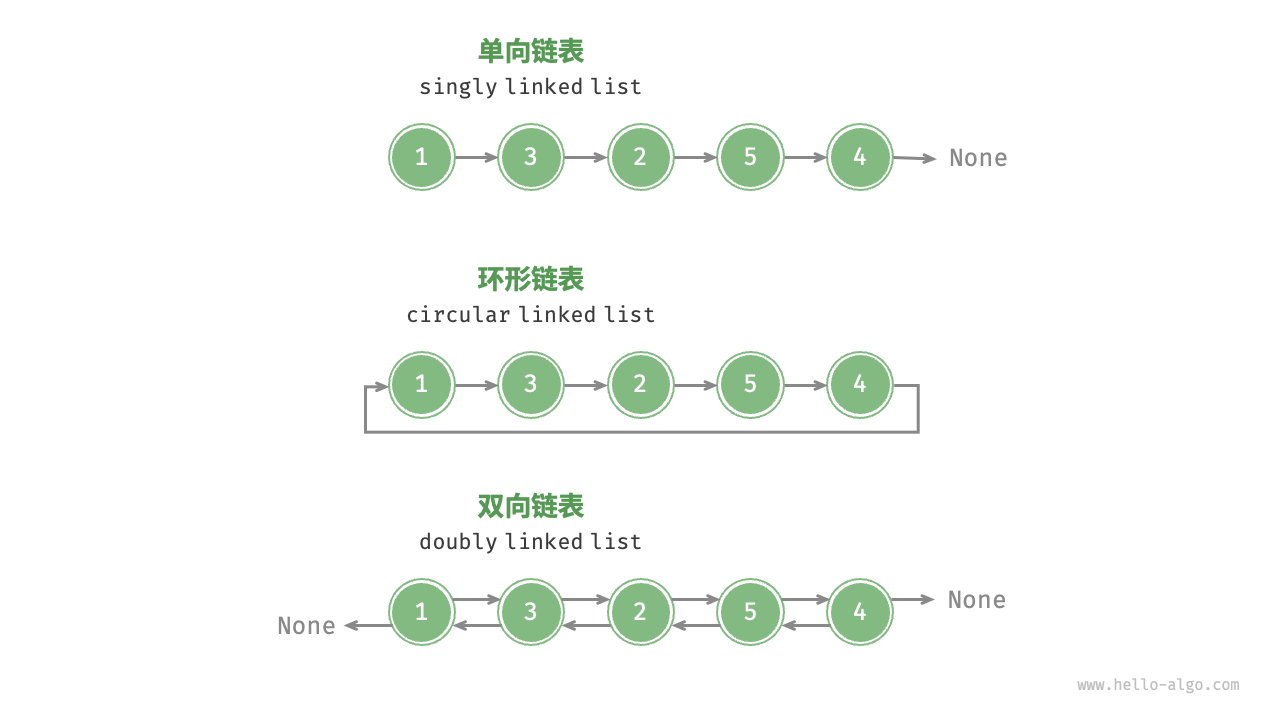

### 4.2.4链表典型应用

单向链表通常用于实现栈、队列、哈希表和图等数据结构。

- **栈与队列**：当插入和删除操作都在链表的一端进行时，它表现的特性为先进后出，对应栈；当插入操作在链表的一端进行，删除操作在链表的另一端进行，它表现的特性为先进先出，对应队列。
- **哈希表**：链式地址是解决哈希冲突的主流方案之一，在该方案中，所有冲突的元素都会被放到一个链表中。
- **图**：邻接表是表示图的一种常用方式，其中图的每个顶点都与一个链表相关联，链表中的每个元素都代表与该顶点相连的其他顶点。

双向链表常用于需要快速查找前一个和后一个元素的场景。

- **高级数据结构**：比如在红黑树、B 树中，我们需要访问节点的父节点，这可以通过在节点中保存一个指向父节点的引用来实现，类似于双向链表。
- **浏览器历史**：在网页浏览器中，当用户点击前进或后退按钮时，浏览器需要知道用户访问过的前一个和后一个网页。双向链表的特性使得这种操作变得简单。
- **LRU 算法**：在缓存淘汰（LRU）算法中，我们需要快速找到最近最少使用的数据，以及支持快速添加和删除节点。这时候使用双向链表就非常合适。

环形链表常用于需要周期性操作的场景，比如操作系统的资源调度。

- **时间片轮转调度算法**：在操作系统中，时间片轮转调度算法是一种常见的 CPU 调度算法，它需要对一组进程进行循环。每个进程被赋予一个时间片，当时间片用完时，CPU 将切换到下一个进程。这种循环操作可以通过环形链表来实现。
- **数据缓冲区**：在某些数据缓冲区的实现中，也可能会使用环形链表。比如在音频、视频播放器中，数据流可能会被分成多个缓冲块并放入一个环形链表，以便实现无缝播放。

## 4.3 列表
<u>列表（list）</u>是一个抽象的数据结构概念，它表示元素的有序集合，支持元素访问、修改、添加、删除和遍历等操作，无须使用者考虑容量限制的问题。列表可以基于链表或数组实现。

- 链表天然可以看作一个列表，其支持元素增删查改操作，并且可以灵活动态扩容。
- 数组也支持元素增删查改，但由于其长度不可变，因此只能看作一个具有长度限制的列表。

当使用数组实现列表时，**长度不可变的性质会导致列表的实用性降低**。这是因为我们通常无法事先确定需要存储多少数据，从而难以选择合适的列表长度。若长度过小，则很可能无法满足使用需求；若长度过大，则会造成内存空间浪费。

为解决此问题，我们可以使用<u>动态数组（dynamic array）</u>来实现列表。它继承了数组的各项优点，并且可以在程序运行过程中进行动态扩容。

实际上，**许多编程语言中的标准库提供的列表是基于动态数组实现的**，例如 Python 中的 `list` 、Java 中的 `ArrayList` 、C++ 中的 `vector` 和 C# 中的 `List` 等。在接下来的讨论中，我们将把“列表”和“动态数组”视为等同的概念。


### 4.3.1 列表常用操作
#### 初始化列表
我们通常使用“无初始值”和“有初始值”这两种初始化方法：

#### 访问元素
列表本质上是数组，因此可以在$O(n)$时间内访问和更新元素，效率很高。



#### 插入与删除元素
相较于数组，列表可以自由地添加与删除元素。在列表尾部添加元素的时间复杂度为$O(1)$，但插入和删除元素的效率仍与数组相同，时间复杂度为$O(n)$。

#### 遍历列表
与数组一样列表可以根据索引遍历，也可以直接遍历各元素

#### 拼接列表
给定一个新列表`nums1`,我们可以直接将其拼接到原列表的尾部。

#### 排序列表
完成列表排序后，我们便可以使用在数组类算法题中经常考查的“二分查找”和“双指针”算法。

### 4.3.2列表实现
许多编程语言内置了列表，例如 Java、C++、Python 等。它们的实现比较复杂，各个参数的设定也非常考究，例如初始容量、扩容倍数等。感兴趣的读者可以查阅源码进行学习。

为了加深对列表工作原理的理解，我们尝试实现一个简易版列表，包括以下三个重点设计。

- 初始容量：选取一个合理的数组初始容量。在本示例中，我们选择 10 作为初始容量。
- 数量记录：声明一个变量 `size` ，用于记录列表当前元素数量，并随着元素插入和删除实时更新。根据此变量，我们可以定位列表尾部，以及判断是否需要扩容。
- 扩容机制：若插入元素时列表容量已满，则需要进行扩容。先根据扩容倍数创建一个更大的数组，再将当前数组的所有元素依次移动至新数组。在本示例中，我们规定每次将数组扩容至之前的 2 倍。